# EC444 Synthesis and optimization of digital circuits

1. Ram Janam Yadav  181EC136

2. Harshith         181EC116

Given a SoP form of Boolean expression, write a program ( in python/C/Java/TclTk/Pearl) to
1. Find the cofactors of the function with respect to any given variable or a set of variables (a, ab ab’ etc) and display the results.
2. For a given variable ordering, find and display the ROBDD of the function.

Part-1 finding the cofactors

In [1]:
"""Import All required Libraries"""
import copy

def variable_seperation(cube):
    """function is used for the variable separation from given sop form of boolean expression"""
    var = []
    for c in cube: 
        b = []
        a = list(c)
        a.append(" ") 
        for i in range(len(a)-1):
            if a[i+1] == "'":
                l = "".join(a[i]+a[i+1])
            elif a[i] == "'" or a[i] == " ":
                continue
            else:
                l = a[i]
            b.append(l)
            for z in range(len(b)):
                for y in range(len(b)):
                    x = y+z+1
                    if x<len(b) and b[z] == b[x]:
                        b.pop(x)
                        x = x-1
        var.append(b)
    return var

In [2]:
fn = input("Put function here: " )
cf_fn = input("put set of variable with respect to which you want the cofactor for ex a,ab,ab' : ")

cubes = fn.split('+')
print(cubes)
fn_vars = variable_seperation(cubes)# variables in given sop expression after variable separation
cf_vars = variable_seperation(cf_fn.split(" "))#split the cofactor variables
co_py = copy.deepcopy(fn_vars)

Put function here: ab+cd
put set of variable with respect to which you want the cofactor for ex a,ab,ab' : ac'
['ab', 'cd']


In [3]:
print(fn_vars)


[['a', 'b'], ['c', 'd']]


In [4]:
print(cf_vars)

[['a', "c'"]]


In [5]:
print(co_py)

[['a', 'b'], ['c', 'd']]


In [6]:
for i in range(len(cf_vars[0])):
    var = cf_vars[0][i]
    if co_py[0][0] == '1':
            break
    a = 0
    b = [0]* len(co_py)
    for j in range(len(co_py)):
        t = 0
        for h in range(len(co_py[j-a])):       
            if co_py and co_py[j-a] and var[0] == co_py[j-a][h-b[j-a]][0]:
                if len(var) == len(co_py[j-a][h-b[j-a]]):
                    co_py[j-a].pop(h-b[j-a])
                    b[j-a] = b[j-a]+1
                    if not co_py[j-a]:
                        co_py = [['1']]
                        break
                else:
                    co_py.pop(j-a)
                    t = 1
                    a = a + 1
                if t == 1:
                    break
        if not co_py:
            co_py = [['0']]
        elif co_py[0][0] == '1':
            break 


i = []
for j in co_py:
    i.append("".join(j))
    
output = "+".join(i)
print('cofactor with respect to given variable or set of variables is',output)


cofactor with respect to given variable or set of variables is b


Part 2 For a given variable ordering, find and display the ROBDD of the function.

In [7]:
class node:
    """Class to create the nodes of graph"""
    def __init__(self, val = None):
        """Initialization of the Node of graph which have one high pointer->1 and other low pointer->0"""
        self.var = val
        self.high = None
        self.low = None
        
node_low = node("0")
node_high = node("1")

def get_put_UT(key, node_):
    """Used to create the Unique Table for The Nodes in graph"""
    if key in unique_table.keys():
        #print(1)
        return unique_table[key]
    else:
        unique_table[key] = node_
        return node_

def var_sep(cube):
    """function is used for the variable separation from given sop form of boolean expression"""
    d = []
    for c in cube: 
        b = []
        a = list(c)
        a.append(" ") 
        for i in range(len(a)-1):
            if a[i+1] == "'":
                l = "".join(a[i]+a[i+1])
            elif a[i] == "'" or a[i] == " ":
                continue
            else:
                l = a[i]
            b.append(l)
            for z in range(len(b)):
                for y in range(len(b)):
                    x = y+z+1
                    if x<len(b) and b[z] == b[x]:
                        b.pop(x)
                        x = x-1
        d.append(b)
    return d

def cofactor(fn,var_):
    """Function is Used to calculate the Cofactor of the fn w.r.t given variable"""
    cubes = fn.split('+')
    fn_vars = var_sep(cubes)
    cf_vars = var_sep(var_.split(" "))
    co_py = copy.deepcopy(fn_vars)
    for i in range(len(cf_vars[0])):
        var = cf_vars[0][i]
        if co_py[0][0] == '1':
            break
        a = 0
        b = [0]* len(co_py)
        for j in range(len(co_py)):
            t = 0
            for h in range(len(co_py[j-a])):       
                if co_py and co_py[j-a] and var[0] == co_py[j-a][h-b[j-a]][0]:
                    if len(var) == len(co_py[j-a][h-b[j-a]]):
                        co_py[j-a].pop(h-b[j-a])
                        b[j-a] = b[j-a]+1
                        
                        if not co_py[j-a]:
                            co_py = [['1']]
                            break
                    else:
                        co_py.pop(j-a)
                        t = 1
                        a = a + 1

                    if t == 1:
                        break
            if not co_py:
                co_py = [['0']]
            elif co_py[0][0] == '1':
                break 
    i = []
    for j in co_py:
        i.append("".join(j))
    output = "+".join(i)
    return output

def depth_first_traversals_inorder(top): 
    """Function is used for DFS traversal of the resultant graph"""
    if top: 
        depth_first_traversals_inorder(top.low) 
        print(top.var)
        depth_first_traversals_inorder(top.high)

def ite(function, variable_order, i):
    """Iterative Algorithm implementation for ROBDD construction"""
    var = variable_order[i]
    cofactor_high = cofactor(function, var)
    var_bar = var+"'"
    cofactor_low = cofactor(function, var_bar)
    key = var + cofactor_high + cofactor_low
    node_ = node(var)
    if cofactor_high=="0":
        node_.high = node_low
    if cofactor_high=="1":
        node_.high = node_high
    if cofactor_low=="0":
        node_.low = node_low
    if cofactor_low == "1":
        node_.low = node_high
        
    if node_.high == None:
        node_.high = ite(cofactor_high, variable_order, i+1)
    if node_.low == None:
        node_.low = ite(cofactor_low, variable_order, i+1)
    
    node_ = get_put_UT(key, node_)
    if node_.high == node_.low:
        return node_.high
    return node_

unique_table = {}

fn = input('Enter function here: ')
var_order = list(input('Enter variable order here: '))

robdd = ite(fn, var_order, 0)

print("depth_first_traversals_inorder")
depth_first_traversals_inorder(robdd)


Enter function here: ab+cd
Enter variable order here: a b c d
depth_first_traversals_inorder
0
c
0
d
1
a
0
c
0
d
1
b
1


In [8]:
def ite1(G,function, variable_order, i):
    """Iterative Algorithm implementation for ROBDD construction"""
    var = variable_order[i]
    cofactor_high = cofactor(function, var)
    var_bar = var+"'"
    cofactor_low = cofactor(function, var_bar)
    key = var + cofactor_high + cofactor_low
    node_ = node(var)
    if cofactor_high=="0":
        node_.high = node_low
        G.add_edge(node_.var,node_.high.var)
    if cofactor_high=="1":
        node_.high = node_high
        G.add_edge(node_.var,node_.high.var)
    if cofactor_low=="0":
        node_.low = node_low
        G.add_edge(node_.var,node_.low.var)
    if cofactor_low == "1":
        node_.low = node_high
        G.add_edge(node_.var,node_.low.var)
        
    if node_.high == None:
        node_.high = ite1(G, cofactor_high, variable_order, i+1)
        if(node_.high!=None):
            G.add_edge(node_.var, node_.high.var)
    if node_.low == None:
        node_.low = ite1(G, cofactor_low, variable_order, i+1)
        if(node_.low!=None):
            G.add_edge(node_.var, node_.low.var)
    
    node_ = get_put_UT(key, node_)
    if node_.high == node_.low:
        return node_.high
    return node_


import networkx as nx
G = nx.Graph()
unique_table = {}

fn = input('Enter function here: ')
var_order = list(input('Enter variable order here: '))

robdd = ite1(G, fn, var_order, 0)

Enter function here: ab+cd+efg+ghi
Enter variable order here: a b c d e f g h i


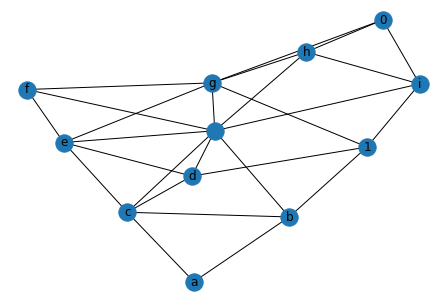

In [9]:
from networkx.drawing.nx_pydot import graphviz_layout
pos = graphviz_layout(G, prog="dot")
nx.draw(G,with_labels=True)

In [11]:
print("All connected edge in the graph",G.edges())

All connected edge in the graph [('b', '1'), ('b', 'c'), ('b', ' '), ('b', 'a'), ('1', 'd'), ('1', 'g'), ('1', 'i'), ('d', 'e'), ('d', ' '), ('d', 'c'), ('g', '0'), ('g', ' '), ('g', 'f'), ('g', 'h'), ('g', 'e'), ('0', 'h'), ('0', 'i'), (' ', 'i'), (' ', 'h'), (' ', 'f'), (' ', 'e'), (' ', 'c'), ('f', 'e'), ('h', 'i'), ('e', 'c'), ('c', 'a')]


# Thank You!